In [1]:
# Works best with jupyter-notebook

In [4]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import roboticstoolbox as rtb
import spatialmath.base as sm
import matplotlib.pyplot as plt
import math
from spatialmath import *
from spatialmath.base import *
from collections import namedtuple
from roboticstoolbox import *
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

##### Lecture 7.4

6-link 3D robot

In [5]:
robot = rtb.models.DH.Puma560()
print(robot)

┏━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃θⱼ  ┃   dⱼ    ┃   aⱼ   ┃   ⍺ⱼ   ┃   q⁻    ┃   q⁺   ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━┫
┃ q1 ┃       0 ┃      0 ┃  90.0° ┃ -160.0° ┃ 160.0° ┃
┃ q2 ┃       0 ┃ 0.4318 ┃   0.0° ┃ -110.0° ┃ 110.0° ┃
┃ q3 ┃ 0.15005 ┃ 0.0203 ┃ -90.0° ┃ -135.0° ┃ 135.0° ┃
┃ q4 ┃  0.4318 ┃      0 ┃  90.0° ┃ -266.0° ┃ 266.0° ┃
┃ q5 ┃       0 ┃      0 ┃ -90.0° ┃ -100.0° ┃ 100.0° ┃
┃ q6 ┃       0 ┃      0 ┃   0.0° ┃ -266.0° ┃ 266.0° ┃
┗━━━━┻━━━━━━━━━┻━━━━━━━━┻━━━━━━━━┻━━━━━━━━━┻━━━━━━━━┛

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
│  qn │  0° │  45° │  180° │  0° │  45° │  0° │
└─────┴─────┴──────┴───────┴─────┴──────┴─────┘



<IPython.core.display.Javascript object>


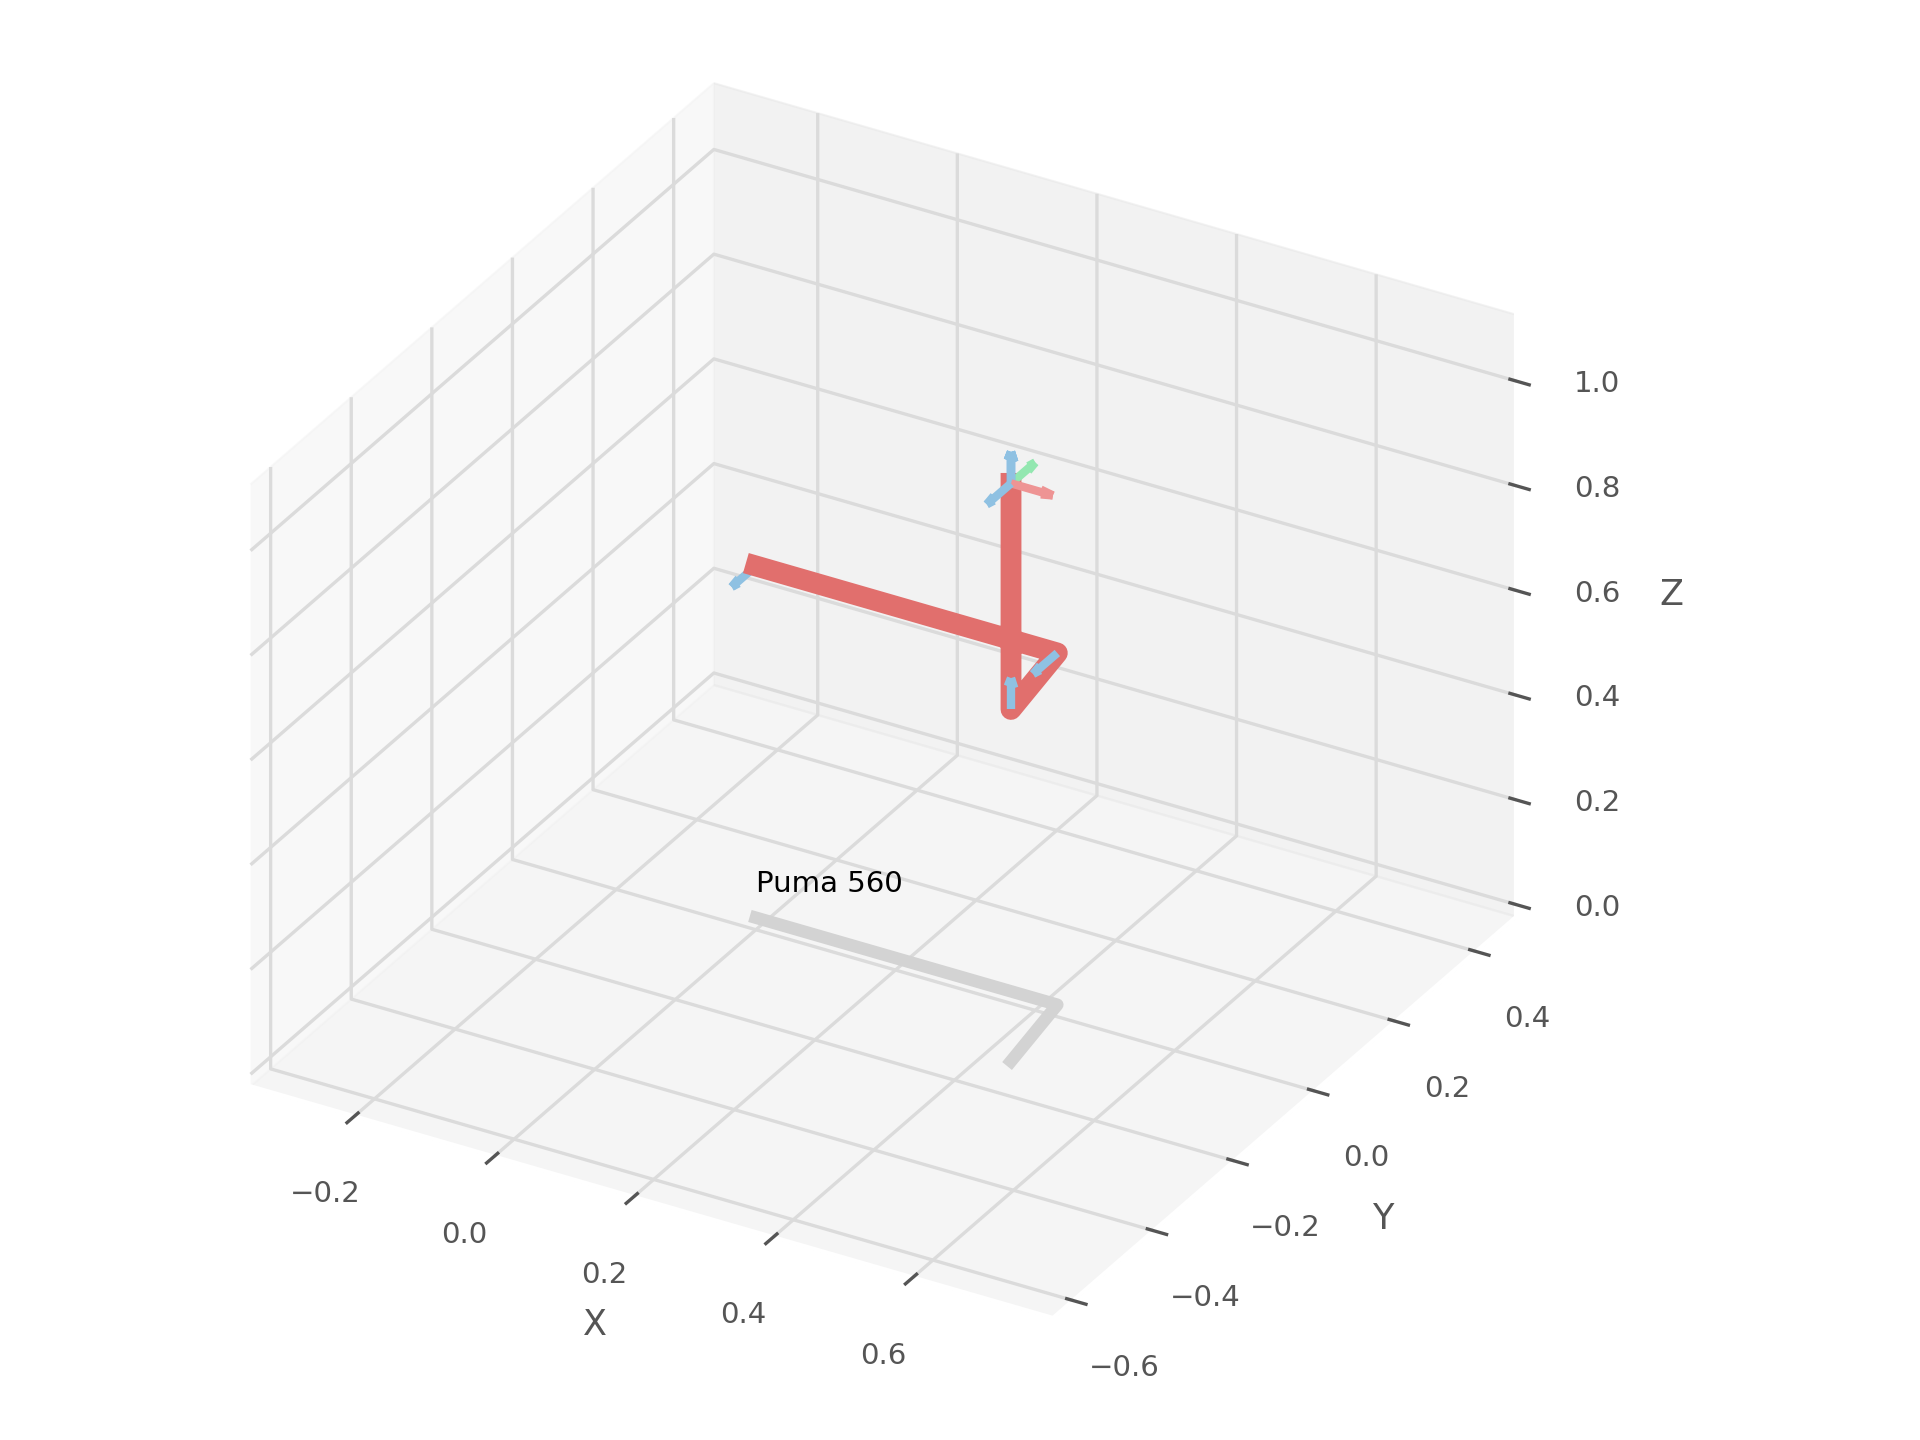

[[      -1        0        0      0.6]
 [       0        1        0      0.1]
 [       0        0       -1        0]
 [       0        0        0        1]]


In [41]:
robot.plot(robot.qz)
T =np.dot( sm.transl(0.6, 0.1, 0), rpy2tr([0, 180, 0], unit='deg'))
print(T)


In [42]:
(q, failed, reason) = robot.ikine(T)
q

array([  0.4926,   -1.315,  -0.4957,   0.1534,    1.516,  -0.5691])

In [43]:
failed

True

In [49]:
robot.ikine_a(T, "run")


ValueError: bad operands

indicating, in this case, that there is no failure. The joint coordinates are

array([       0,   0.7854,    3.142,        0,   0.7854,        0])

In [33]:
q = robot.ikine_a(T, "run")
q

ValueError: bad operands